# Speech Command

In [128]:
import wave
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io.wavfile import read


%matplotlib inline

## Première Étape
### Fichier Wave

In [68]:
signal_wave = wave.open("test3/enavant.wav")

On veut découper notre signal en trames de quelques dizaines de millisecondes.

In [69]:
(nchannels, sampwidth, framerate, nframes, comptype, compname) = signal_wave.getparams()

On va prendre des trames de 20 millisecondes, on veut donc des trames de 320 bytes.

In [70]:
nbytes = 320
ntrames = nframes/nbytes
print(ntrames)

31.48125


In [71]:
def get_trames(signal, nbytes=320):
    (nchannels, sampwidth, framerate, nframes, comptype, compname) = signal.getparams()
    trames = []
    signal.rewind()
    while signal.tell() != nframes:
        trame = signal.readframes(nbytes)
        trames.append(trame)
    return trames

trames = get_trames(signal=signal_wave, nbytes=nbytes)
print(len(trames))

32


On a fini la première étape, on a décomposé notre signal en 32 trames de quelques dizaines de millisecondes.

Les 31 premières font 20 millisecondes, et la dernière est un peu plus courte.

### En Numpy

In [98]:
[fs, a] = read("test3/stop.wav")
signal_avant = np.array(a,dtype=float)

In [99]:
f, t, Zxx = signal.stft(x = signal_avant, fs=fs, nperseg=320)

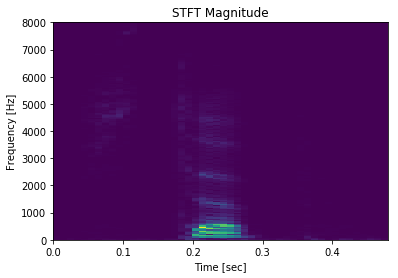

In [100]:
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [108]:
folder = "test3/"
files = ["enavant.wav", "enavant2.wav", "enavant3.wav", "adroite.wav", "adroite2.wav", "adroite3.wav", "agauche.wav", "agauche2.wav", "agauche3.wav", "stop.wav", "stop2.wav", "stop3.wav"]
file = "stop.wav"

In [120]:
def add_fft(folder, file, nperseg, noverlap):
    [fs, a] = read(folder + file)
    sig = np.array(a,dtype=float)
    f, t, Zxx = signal.stft(x = sig, fs=fs, noverlap=noverlap, nperseg=nperseg)
    fft_signal = {
        "frequencies": f,
        "times": t,
        "stft": Zxx
    }
    if "avant" in file:
        fft_signal["class"] = "avant"
    elif "droite" in file:
        fft_signal["class"] = "droite"
    elif "gauche" in file:
        fft_signal["class"] = "gauche"
    elif "stop" in file:
        fft_signal["class"] = "stop"
    return fft_signal

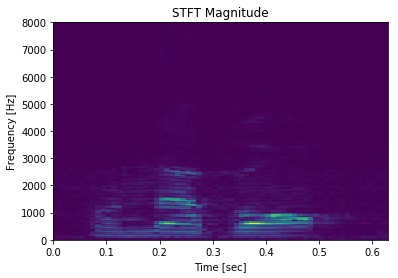

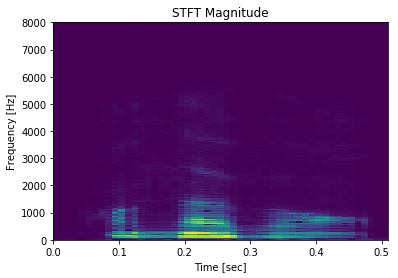

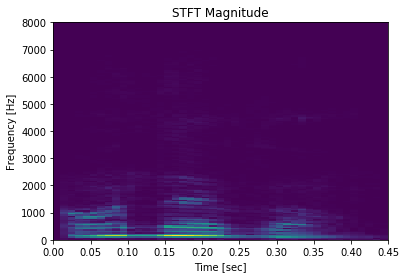

In [121]:
signals = []
for file_ in files:
    signal_ = add_fft(folder=folder, file=file_, nperseg=320, noverlap=160)
    signals.append(signal_)
    if signal_.get('class') == 'avant':
        plt.pcolormesh(signal_.get('times'), signal_.get('frequencies'), np.abs(signal_.get('stft')), vmin=0)
        plt.title('STFT Magnitude')
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.show()

In [131]:
signals[0].get("stft")

array([[ -3.07852396e+01 +0.00000000e+00j,
         -2.48266857e+01 +0.00000000e+00j,
          6.05605761e+00 +0.00000000e+00j, ...,
         -1.72569440e+01 +0.00000000e+00j,
          5.65944990e+01 +0.00000000e+00j,
          3.86482293e+01 +0.00000000e+00j],
       [  3.83061141e+01 -6.29816411e+00j,
          6.16060994e+01 +5.09443647e+00j,
          4.36923549e+01 -1.82391237e+01j, ...,
          1.56701286e+01 -2.30977719e+01j,
         -6.45257101e+01 -9.41316657e+01j,
         -5.80376213e+01 -1.71600963e+01j],
       [ -3.62345999e+01 +3.30081100e+01j,
         -9.31114216e+01 +3.37479835e+01j,
         -9.88950889e+01 +1.40487638e+01j, ...,
          5.86777560e+01 +9.47877957e+01j,
          4.39197145e+01 +1.22167333e+02j,
          3.10250660e+01 +8.44779973e+01j],
       ..., 
       [  4.12378008e-01 +7.60145377e-01j,
          1.03297866e+00 -3.44174324e-01j,
         -8.37689125e-01 -1.23644852e+00j, ...,
         -1.45600583e+00 +4.88162570e-01j,
         -5.698657

In [129]:
fmin = min(signals[0].get("frequencies"))
fmin = 2595 * math.log10( 1 + fmin / 700)
fmax = max(signals[0].get("frequencies"))
fmax = 2595 * math.log10( 1 + fmax / 700)
nf = len(signals[0].get("frequencies"))
w = 2*(fmax - fmin) / (nf + 1)